# coding education company marketing analysis
using FCC's 2017 new coder survey https://github.com/freeCodeCamp/2017-new-coder-survey, we will select markets to market our company's software education products to.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [3]:
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.JobRoleInterest.value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                           11.770595
  Front-End Web Developer                                                                                                                                                                           6.435927
  Data Scientist                                                                                                                                                                                    2.173913
Back-End Web Developer                                                                                                                                                                              2.030892
  Mobile Developer                                                                                                                                                                  

In [5]:
df.JobRoleInterest.value_counts()[:10]

Full-Stack Web Developer                               823
  Front-End Web Developer                              450
  Data Scientist                                       152
Back-End Web Developer                                 142
  Mobile Developer                                     117
Game Developer                                         114
Information Security                                    92
Full-Stack Web Developer,   Front-End Web Developer     64
  Front-End Web Developer, Full-Stack Web Developer     56
  Product Manager                                       55
Name: JobRoleInterest, dtype: int64

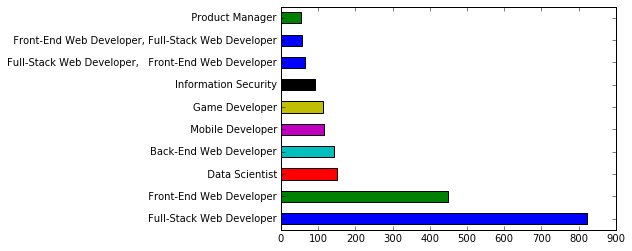

In [6]:
df.JobRoleInterest.value_counts()[:10].plot.barh()

most users in the population are intested in several job roles. mobile development, web development, data science and game development are the populations of interest for our analysis since they are our site's primary courses. as seen in the graph, these categories of job seekers are among the most represented by the FCC dataset, so using the data set to make inferences about our population of interest should be a fairly safe assumption.

In [7]:
df.shape

(18175, 136)

In [8]:
df.JobRoleInterest.isnull().sum()

11183

In [9]:
df = df.loc[df.JobRoleInterest.notna()]

In [10]:
df.shape

(6992, 136)

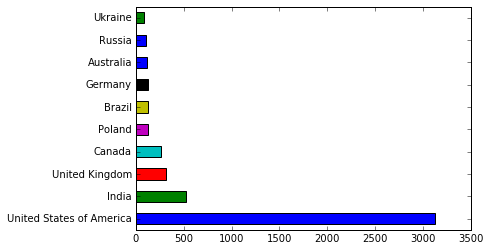

In [11]:
df.CountryLive.value_counts()[:10].plot.barh()

after dropping records that didn't have a job role interest selected and summing the countries where respondents live, we should advertise in the US and India markets.


In [12]:
df = df.loc[~df.MoneyForLearning.isna() & ~df.MonthsProgramming.isna()]

In [13]:
df.shape

(6317, 136)

In [14]:
(df['MonthsProgramming']==0).value_counts()

False    6088
True      229
Name: MonthsProgramming, dtype: int64

In [15]:
df.loc[df['MonthsProgramming']==0,'MonthsProgramming'] = 1

In [16]:
(df['MonthsProgramming']==0).value_counts()

False    6317
Name: MonthsProgramming, dtype: int64

In [17]:
df['SpentPerMonth']=df['MoneyForLearning']/df['MonthsProgramming']

In [18]:
df.CountryLive.value_counts()[:10]

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: CountryLive, dtype: int64

In [19]:
df.CountryLive.value_counts()[:4].index

Index(['United States of America', 'India', 'United Kingdom', 'Canada'], dtype='object')

In [20]:
top4 = df[df.CountryLive.isin(df.CountryLive.value_counts()[:4].index)]

In [21]:
top4.CountryLive.value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [22]:
top4.shape

(3915, 137)

In [23]:
top4.groupby('CountryLive')['SpentPerMonth'].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: SpentPerMonth, dtype: float64

as we can see, all four of our countries of interest are heavily influenced by their outliers

In [24]:
top4.groupby('CountryLive').SpentPerMonth.describe()

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


In [25]:
top4a = top4[top4.CountryLive == 'United States of America']

In [26]:
top4k = top4[top4.CountryLive == 'United Kingdom']

In [27]:
top4i = top4[top4.CountryLive == 'India']

In [28]:
top4c = top4[top4.CountryLive == 'Canada']

In [29]:
top4as = top4a.SpentPerMonth

In [30]:
top4ks = top4k.SpentPerMonth

In [31]:
top4is = top4i.SpentPerMonth

In [32]:
top4cs = top4c.SpentPerMonth

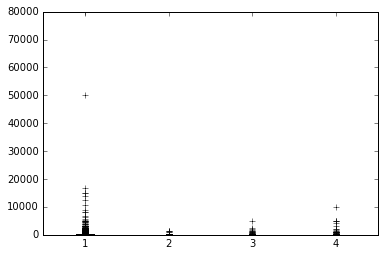

In [33]:
plt.boxplot([top4as.values, top4ks.values, top4cs.values, top4is.values])
plt.show()

(0, 500)

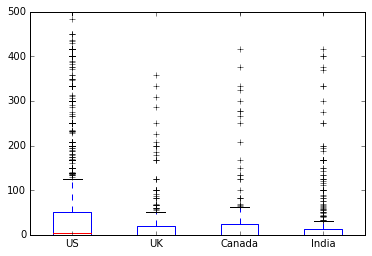

In [34]:
plt.boxplot([top4as.values, top4ks.values, top4cs.values, top4is.values],labels=['US','UK','Canada','India'])
plt.ylim(0,500)
#plt.xticks(['a,','b','c','d'])

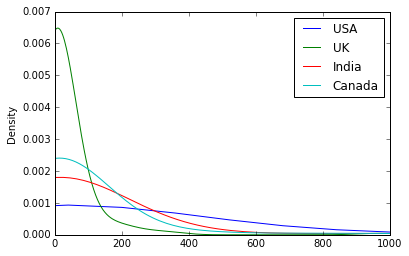

In [35]:
top4as.plot.kde(xlim=(0,1000),label='USA')
top4ks.plot.kde(xlim=(0,1000),label='UK')
top4is.plot.kde(xlim=(0,1000),label='India')
top4cs.plot.kde(xlim=(0,1000),label='Canada')
plt.legend()

its clear that these are extremly positively skewed distributions

# removing extreme outliers

In [36]:
cleaned_means=[]

In [37]:
asc = top4as[abs((top4as - top4as.mean()) / top4as.std()) < 3]

In [38]:
cleaned_means.append(asc.mean())

In [39]:
ksc = top4ks[abs((top4ks - top4ks.mean()) / top4ks.std()) < 3]

In [40]:
cleaned_means.append(ksc.mean())

In [41]:
csc = top4cs[abs((top4cs - top4cs.mean()) / top4cs.std()) < 3]

In [42]:
cleaned_means.append(csc.mean())

In [43]:
isc = top4is[abs((top4is - top4is.mean()) / top4is.std()) < 3]

In [44]:
cleaned_means.append(isc.mean())

In [45]:
pd.Series(cleaned_means, ['US','UK','Canada','India'], name='Cleaned Means')

US        142.654608
UK         25.245838
Canada     62.363676
India      65.758763
Name: Cleaned Means, dtype: float64

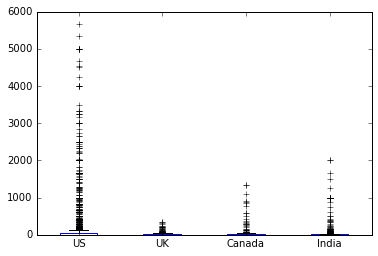

In [46]:
plt.boxplot([asc.values, ksc.values, csc.values, isc.values],labels=['US','UK','Canada','India'])
plt.show()

(0, 500)

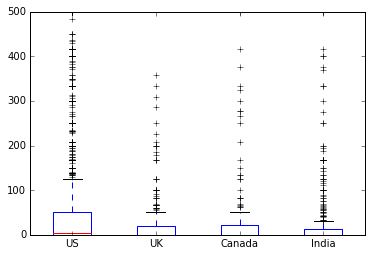

In [47]:
plt.boxplot([asc.values, ksc.values, csc.values, isc.values],labels=['US','UK','Canada','India'])
plt.ylim(0,500)

(0, 200)

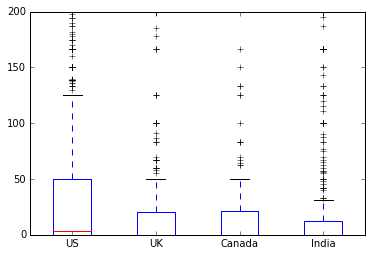

In [48]:
plt.boxplot([asc.values, ksc.values, csc.values, isc.values],labels=['US','UK','Canada','India'])
plt.ylim(0,200)

In [49]:
df.CountryLive.value_counts()[:4]

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

recalling the number of survey respondents that live in each country, I'm recommending that we advertise in the US and India. US customers seem to be willing to spend the most money on educational resources and their numbers are the greatest, so they are an easy pick for the top marketing target. 
The second marketing target choice is less clear, since the UK, Canada, and India seem to be on par in regards to how much money they are willing to spend for a service like ours. However, since India has significantly more members in our data than the other two nations, I'm selecting India as our second marketing target.